# subsub
## Issue 4: Spotcheck the MCMC


We have our first results from running starfish on IGRINS spectral order m = 115.  
We ran it for 8 hours on TACC on 20 cores. on July 13.

## Retrieve the data from TACC

```bash
rsync -am --include='temp_emcee_chain.npy' --include='*/' --exclude='*' gully@maverick.tacc.utexas.edu:/home/03342/gully/science/subsub/sf/m115/output/subsub_m115/run01/ .
```

## Read in the Data

In [1]:
#ws = np.load("../sf/m115/output/subsub_m115/run01/emcee_chain.npy")

In [13]:
ws = np.load("../sf/m115/output/subsub_m115/run01/temp_emcee_chain_604042_maybe.npy")

In [14]:
ws.shape

(40, 5000, 14)

In [15]:
from matplotlib.ticker import MaxNLocator

In [16]:
label = ["$T_{\mathrm{eff}}$", "$\log{g}$", "$[\mathrm{Fe}/\mathrm{H}]$","$v_z$", "$v\sin{i}$", "$\log{\Omega}$", 
         "$T_{\mathrm{eff, 2}}$", "$\log{\Omega_2}$", "$c^1$", "$c^2$", "$c^3$", "sigAmp", "logAmp", "$l$"] 

In [17]:
mask = ws[0, :, 0] != 0

In [18]:
mask.sum()

2150

It looks like it took only 1400 steps before it failed.

In [19]:
ws_old = ws
ws = ws[:, 0:2150, :]

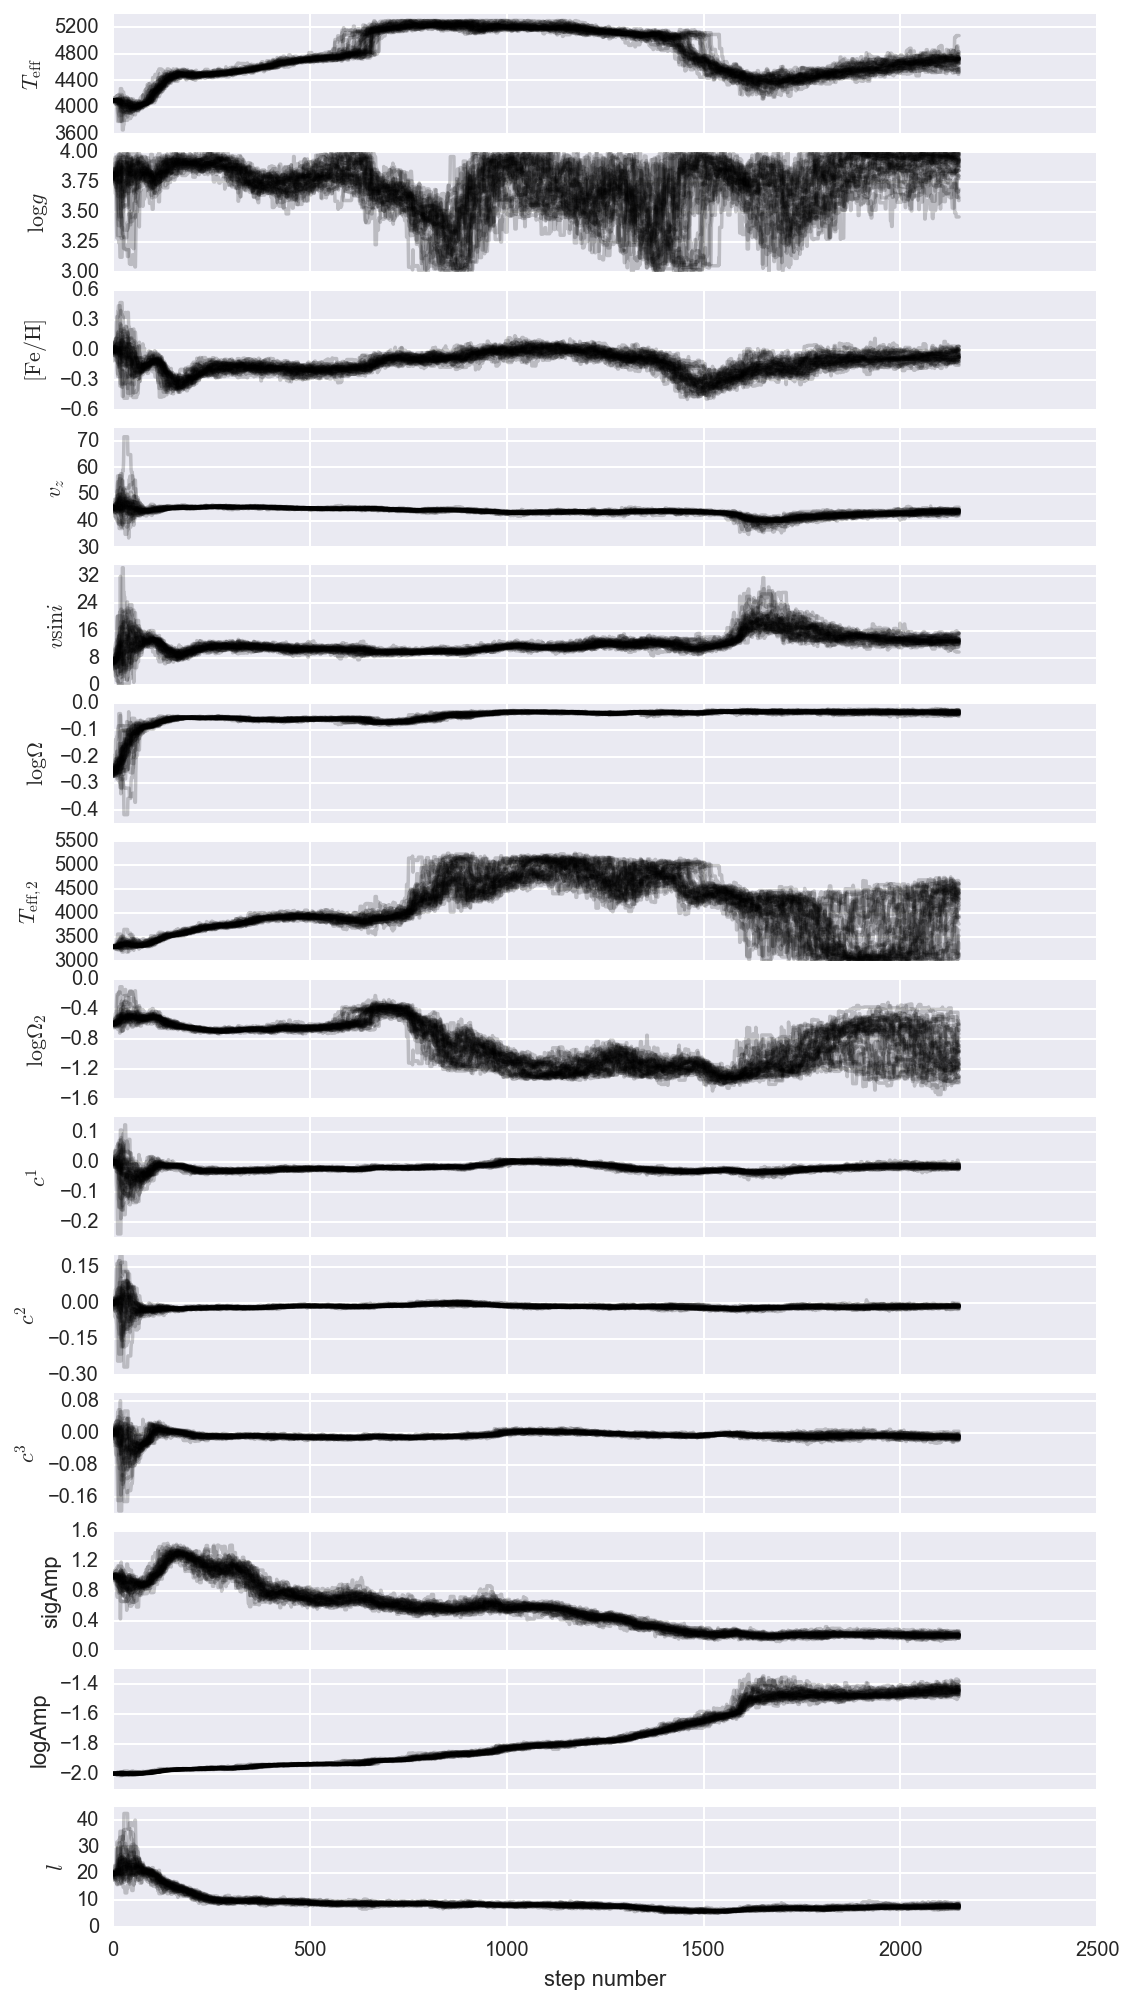

In [20]:
fig, axes = plt.subplots(14, 1, sharex=True, figsize=(8, 14))
for i in range(0, 14, 1):
    axes[i].plot(ws[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[13].set_xlabel("step number")

fig.tight_layout(h_pad=0.0)
plt.savefig('../results/figs/subsub_m115_2150samples.png', dpi=300, bbox_inches='tight')

In [10]:
ws.shape

(40, 1399, 14)

In [21]:
np.save('/Users/gully/GitHub/subsub/sf/m115/output/subsub_m115/run01/emcee_Run_604042_2150samples.npy', ws)

In [26]:
burned = ws[:, 1950:,:]
xs, ys, zs = burned.shape
fc = burned.reshape(xs*ys, zs)
nx, ny = fc.shape

In [27]:
fc.shape

(0, 14)

KeyboardInterrupt: 

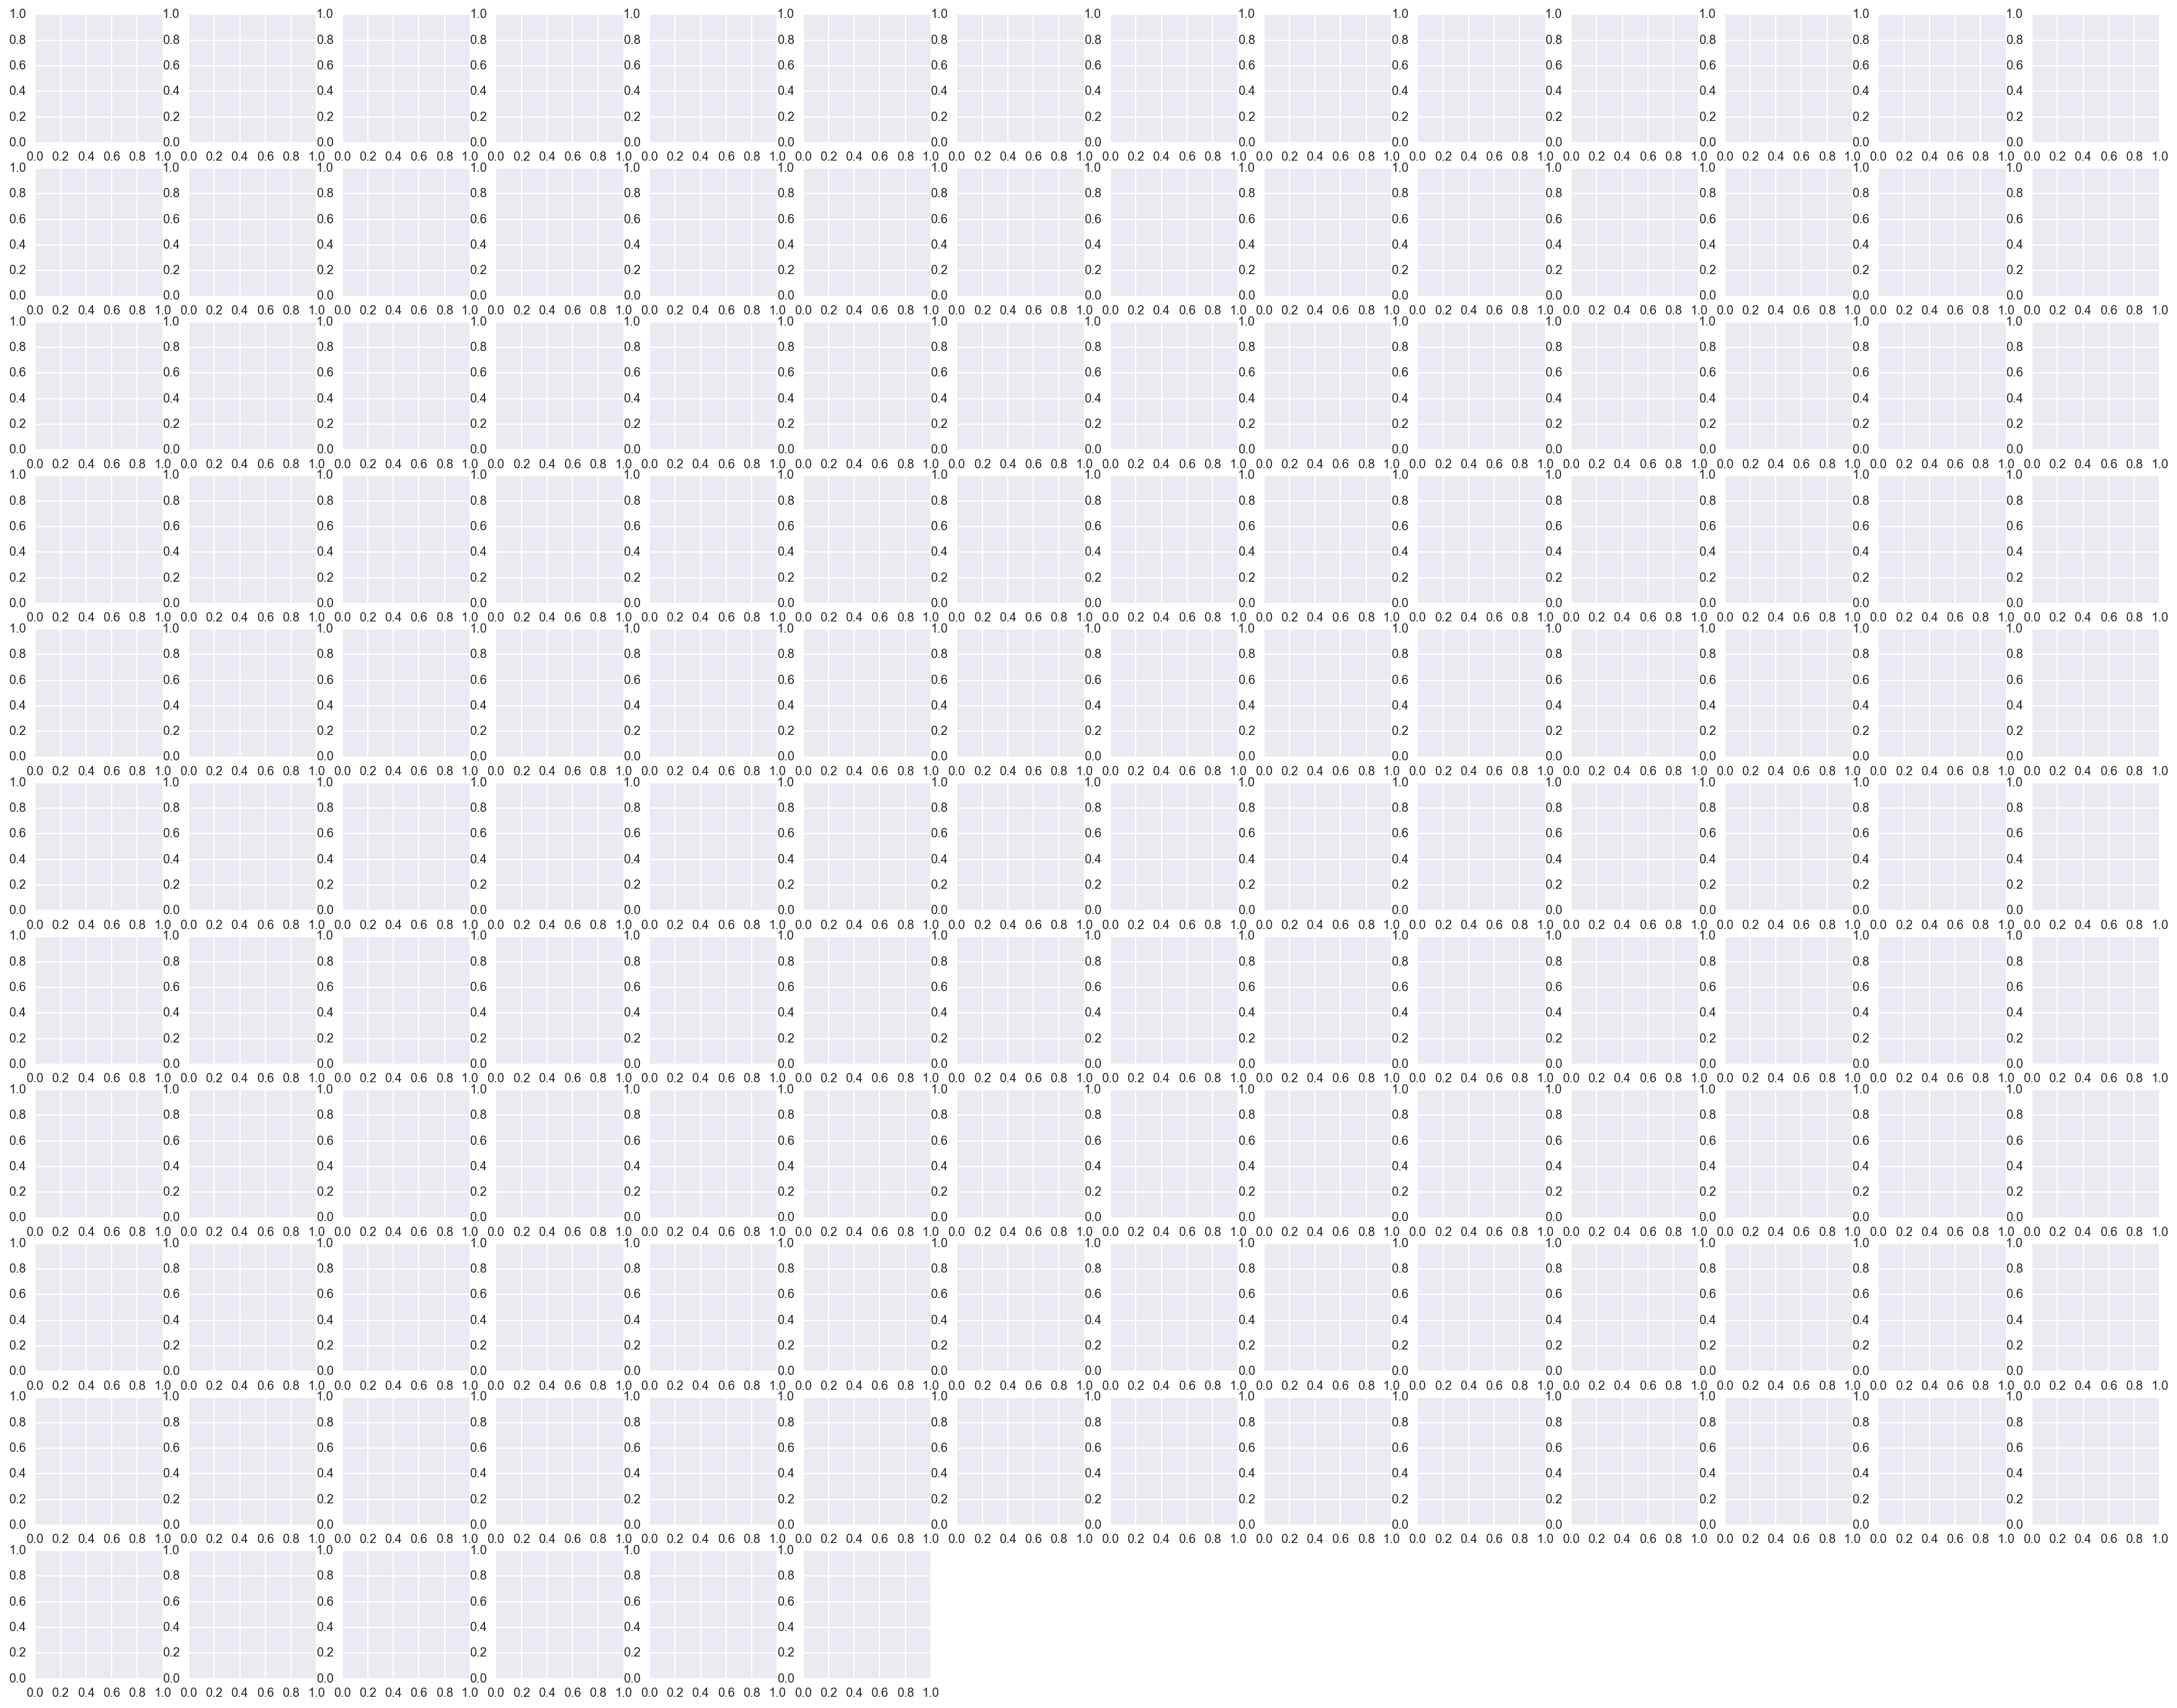

In [25]:
import corner
fig = corner.corner(fc, labels=label)
fig.savefig('../results/figs/subsub_m115_demo_corner.png', dpi=300)

The end.